In [49]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

In [50]:
from src import ajustar_min_cuadrados

# UTILICE:
# ajustar_min_cuadrados()

In [51]:
# Reemplace con el conjunto de datos dado
# --- Datos de ejemplo
xs = [0, 20, 40, 60, 80, 100]
ys = [300, 400, 500, 600, 700, 800]

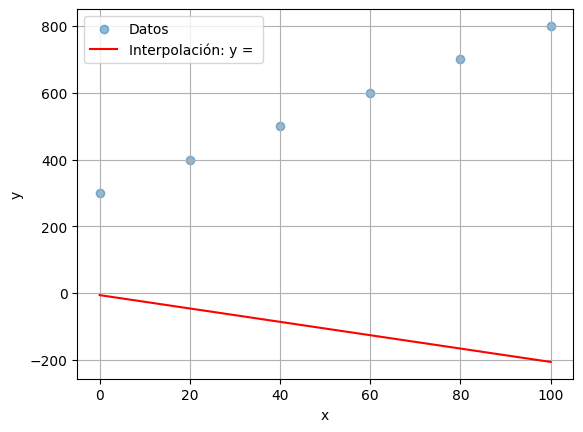

In [52]:
# Reemplace con la función obtenida de ajustar_min_cuadrados
interpolacion = lambda x: -2 * x - 6
# --- Función de ejemplo

import matplotlib.pyplot as plt
import numpy as np

# Dibujar los puntos x, y
plt.scatter(xs, ys, alpha=0.5, label="Datos")

# Dibujar la función de aproximación
x_aprox = np.linspace(min(xs), max(xs), 100)
y_aprox = [interpolacion(xi) for xi in x_aprox]
plt.plot(x_aprox, y_aprox, "r-", label="Interpolación: y = ")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Derivadas parciales para regresión cuadrática (Orden 2)
# ####################################################################

def der_parcial_2(xs: list, ys: list) -> tuple:
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum((xi**2) * yi for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple:
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple:
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    c_ind = sum(yi for yi in ys)
    return (c_2, c_1, c_0, c_ind)

In [54]:
import numpy as np

# Datos
puntos = [(4.1,5.4), (3.6,5.4), (3.3,5.3), (0.2,5.0), (9.8,6.1), (9.5,6.0), (3.2,5.3), (5.8,5.5), (0.7,5.2), (4.2,5.4), (5.4,5.7), (6.3,5.7), (0.3,5.1), (1.0,5.3), (9.3,5.7), (2.4,5.2), (4.7,5.5), (8.8,6.0), (5.2,5.5), (5.6,5.7), (4.8,5.5), (9.7,6.1), (7.5,5.9), (0.7,5.1), (8.2,5.9), (0.6,5.0), (2.3,5.3), (8.4,5.6), (0.4,5.1), (1.6,5.1), (1.5,5.1), (9.6,6.0), (6.6,5.5), (0.9,5.0), (8.2,6.1), (5.5,5.5), (9.4,5.9), (4.3,5.4), (6.4,5.6), (3.3,5.5), (2.8,5.3), (3.3,5.2), (0.9,5.3), (5.8,5.7), (4.3,5.5), (1.0,5.1), (5.4,5.5), (8.0,5.9), (8.6,5.8), (4.0,5.4), (8.9,5.8), (3.0,5.4), (9.2,5.9), (3.3,5.3), (8.9,5.9), (2.3,5.1), (1.9,5.1), (3.5,5.5), (4.3,5.4), (5.8,5.5), (8.9,5.9), (0.7,5.1), (5.8,5.6), (6.2,5.7), (2.4,5.3), (1.5,5.1), (0.2,5.1), (3.1,5.3), (6.2,5.6), (4.5,5.4), (3.1,5.3), (1.3,5.1), (2.0,5.3), (-200.0,500), (0.4,5.1), (5.4,5.5), (4.6,5.6), (0.6,4.9), (1.6,5.2), (1.9,5.2), (2.2,5.4), (6.4,5.5), (1.1,5.0), (7.9,5.8), (8.1,5.6), (3.8,5.3), (1.1,4.9), (3.0,5.4), (5.6,5.6), (5.4,5.5), (0.3,5.1), (8.3,6.1), (8.5,5.8), (5.3,5.6), (1.5,5.1), (0.9,5.1), (2.7,5.3), (3.0,5.3), (8.0,5.7), (2.0,5.2), (9.4,6.0) ]

xs = [p[0] for p in puntos]
ys = [p[1] for p in puntos]

gradiente = [der_parcial_2, der_parcial_1, der_parcial_0]
matriz = []
xs = [p[0] for p in puntos]
ys = [p[1] for p in puntos]


gradiente = [der_parcial_2, der_parcial_1, der_parcial_0]
matriz = []
vector = []

for func in gradiente:
    c2, c1, c0, cind = func(xs, ys)
    matriz.append([c2, c1, c0])
    vector.append(cind)


a = np.linalg.solve(matriz, vector)

interpolacion = lambda x: a[0]*x**2 + a[1]*x + a[2]

In [55]:
# errores relativos
y_estimados = [interpolacion(xi) for xi in xs]
errores_relativos = [abs((yi - ye) / yi) for yi, ye in zip(ys, y_estimados)]

err_min = min(errores_relativos)
err_max = max(errores_relativos)
err_prom = np.mean(errores_relativos)

print(f"Polinomio: f(x) = {a[0]:.6f}x^2 + {a[1]:.6f}x + {a[2]:.6f}")

print(f"error relativo min: {err_min}")
print(f"error relativo maz: {err_max}")
print(f"error relativo prom: {err_prom}")

Polinomio: f(x) = 0.012270x^2 + -0.020034x + 5.196614
error relativo min: 3.1921264485390565e-06
error relativo maz: 0.06517833872324007
error relativo prom: 0.020182562449120423


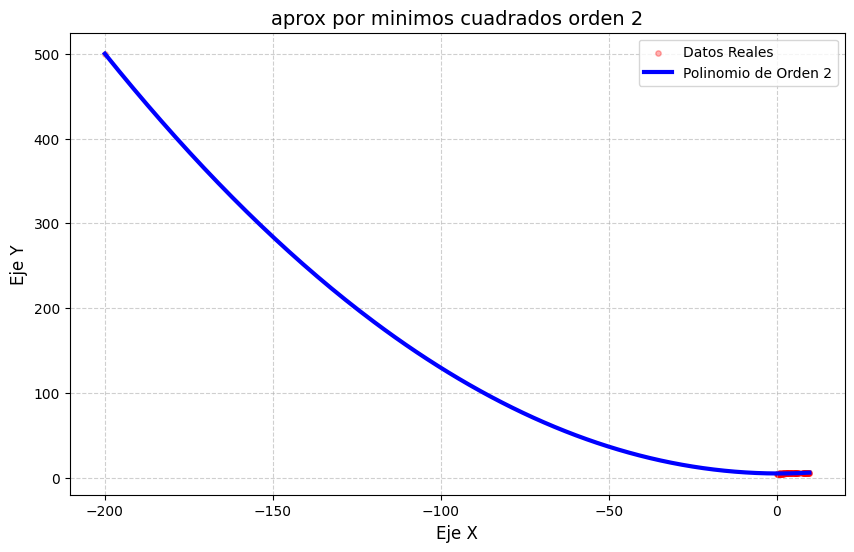

In [56]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))

plt.scatter(xs, ys, color='red', alpha=0.3, s=15, label="Datos Reales")

x_curva = np.linspace(min(xs), max(xs), 200)
y_curva = [interpolacion(xi) for xi in x_curva]

# curva de aproximación orden 2
plt.plot(x_curva, y_curva, color='blue', linewidth=3, label="Polinomio de Orden 2")

plt.title("aprox por minimos cuadrados orden 2", fontsize=14)
plt.xlabel("Eje X", fontsize=12)
plt.ylabel("Eje Y", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()